In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


# Reading the data

In [24]:
sales = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')

In [25]:
sales.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [26]:
sales.drop('Invoice ID',axis=1,inplace=True)

In [27]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

# Feature extraction

In [28]:
sales['High Quantity'] = sales['Quantity'].apply(lambda x: 1 if x > 5 else 0)
sales['Low Quantity'] = sales['Quantity'].apply(lambda x: 1 if x < 5 else 0)

In [29]:
sales['High Payment'] = sales['Total'].apply(lambda x: 1 if x > 500 else 0)
sales['Low Payment'] = sales['Total'].apply(lambda x: 1 if x < 500 else 0)

In [30]:
sales['Is Member'] = sales['Customer type'].replace(['Member','Normal'],[1,0])
sales['Not Member'] = sales['Customer type'].replace(['Member','Normal'],[0,1])

In [31]:
sales['High Rating'] = sales['Rating'].apply(lambda x: 1 if x > 7 else 0)
sales['Low Rating'] = sales['Rating'].apply(lambda x: 1 if x < 7 else 0)

In [32]:
sales['Payment'].replace('Cash', 0,inplace=True)
sales['Payment'].replace('Credit card', 1,inplace=True)
sales['Payment'].replace('Ewallet', 2,inplace=True)

sales['City'].replace('Yangon', 0,inplace=True)
sales['City'].replace('Mandalay', 1,inplace=True)
sales['City'].replace('Naypyitaw', 2,inplace=True)

sales['Gender'].replace('Female', 0,inplace=True)
sales['Gender'].replace('Male', 1,inplace=True)

sales['Branch'].replace('A', 0,inplace=True)
sales['Branch'].replace('B', 1,inplace=True)
sales['Branch'].replace('C', 2,inplace=True)

In [33]:
sales.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,...,gross income,Rating,High Quantity,Low Quantity,High Payment,Low Payment,Is Member,Not Member,High Rating,Low Rating
0,0,0,Member,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,...,26.1415,9.1,1,0,1,0,1,0,1,0
1,2,2,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,...,3.8200,9.6,0,0,0,1,0,1,1,0
2,0,0,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,...,16.2155,7.4,1,0,0,1,0,1,1,0


# EDA

<AxesSubplot:>

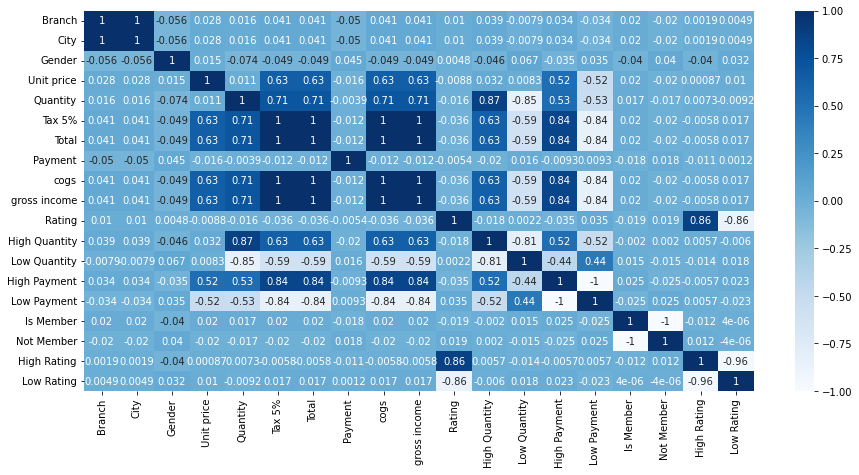

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(sales.drop('gross margin percentage',axis=1).corr(),annot=True,cmap='Blues')

<AxesSubplot:xlabel='Rating', ylabel='Density'>

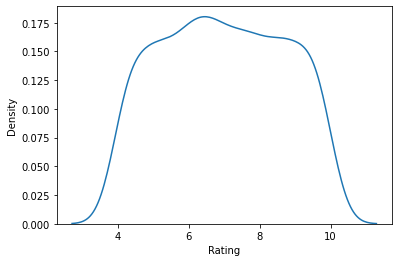

In [35]:
sns.kdeplot(x='Rating',data=sales)

([<matplotlib.patches.Wedge at 0x7f63c7573190>,
 [Text(-0.0656202821455366, 1.0980409730839467, 'High Rating'),
  Text(0.06562028214553646, -1.0980409730839467, 'Low Rating')],
 [Text(-0.03579288117029268, 0.5989314398639708, '51.9%'),
  Text(0.035792881170292605, -0.5989314398639708, '48.1%')])

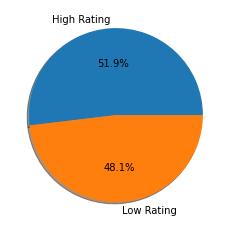

In [36]:
plt.pie(sales['High Rating'].value_counts(),autopct='%1.1f%%', shadow=True, labels=['High Rating','Low Rating'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='High Rating', ylabel='count'>

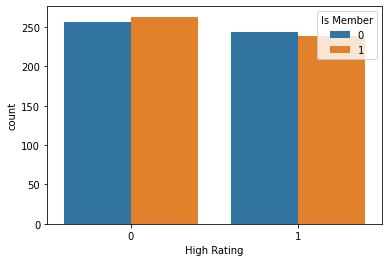

In [37]:
sns.countplot('High Rating',data=sales,hue='Is Member')

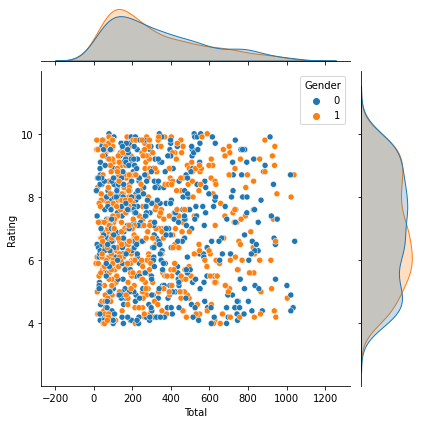

In [38]:
sns.jointplot(x='Total',y='Rating',hue='Gender',data=sales)

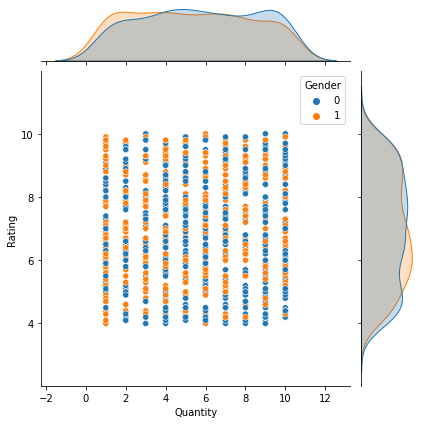

In [39]:
sns.jointplot(x='Quantity',y='Rating',hue='Gender',data=sales)

<AxesSubplot:xlabel='High Rating', ylabel='Total'>

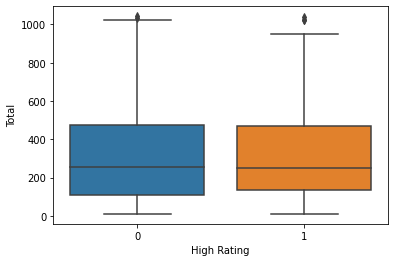

In [40]:
sns.boxplot(x='High Rating',y='Total',data=sales)

# Feature Selection

In [41]:
X = sales[['Branch', 'Gender','City',
        'Unit price', 'Quantity', 'Tax 5%', 'Total',
      'High Quantity','Low Quantity', 'Payment', 'cogs', 'gross income',
       'High Payment', 'Low Payment','Is Member','Not Member','Low Rating']]

y = sales['High Rating']


# Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       152
           1       0.97      1.00      0.99       148

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



Confusion matrix


<AxesSubplot:>

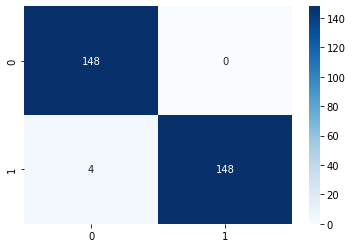

In [44]:
print(classification_report(y_test,prediction))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(prediction,y_test),cmap='Blues',annot=True,fmt='g')

### Thank You !